In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from PIL import Image
from matplotlib.image import imread
import os
import random
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow import keras
from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D
from keras.layers import Activation, Dropout,  Flatten, Dense,MaxPool2D

In [ ]:
train_path= 'melanoma_cancer_dataset/train'
test_path= 'melanoma_cancer_dataset/test'
os.listdir(train_path)

['benign', 'malignant']

Data Augmentation

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   zoom_range = 0.2,
                                   rotation_range=15,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (150, 150),
                                                 batch_size = 16,
                                                 class_mode = 'binary',
                                                 shuffle=True)

test_set = test_datagen.flow_from_directory(test_path,
                                            target_size = (150, 150),
                                            batch_size = 16,
                                            class_mode = 'binary',
                                            shuffle = False)

Found 9605 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


Built Convolutional Neural Network

In [ ]:
image_size = (150,150,3)

model = Sequential()
model.add(Conv2D(64,(3,3),activation = "relu", input_shape = image_size))
model.add(MaxPool2D())

model.add(Conv2D( 128, (3,3), activation = "relu"))
model.add(MaxPool2D())
model.add(Dropout(0.2))

model.add(Conv2D( 256,(3,3), activation = "relu"))
model.add(MaxPool2D())
model.add(Dropout(0.2))

model.add(Conv2D( 512,(3,3), activation = "relu"))
model.add(MaxPool2D())
model.add(Dropout(0.2))


model.add(Flatten())
model.add(Dense(128, activation = "relu"))
model.add(Dropout(0.15))

model.add(Dense(1, activation = "sigmoid"))


model.compile(loss = "binary_crossentropy", optimizer = 'adam', metrics = ["accuracy"])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 128)      0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 36, 36, 128)       0         
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 256)       2

In [ ]:
#plot model layer
keras.utils.plot_model(model,show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [ ]:
history = model.fit(training_set, validation_data=test_set,steps_per_epoch=10,epochs=100)

Epoch 1/100
10/10 [==============================] - 21s 2s/step - loss: 0.6822 - accuracy: 0.5312 - val_loss: 0.6820 - val_accuracy: 0.5000
Epoch 2/100
10/10 [==============================] - 16s 2s/step - loss: 0.6881 - accuracy: 0.5500 - val_loss: 0.6814 - val_accuracy: 0.5000
Epoch 3/100
10/10 [==============================] - 19s 2s/step - loss: 0.5814 - accuracy: 0.7125 - val_loss: 0.5624 - val_accuracy: 0.7530
Epoch 4/100
10/10 [==============================] - 19s 2s/step - loss: 0.7999 - accuracy: 0.5688 - val_loss: 0.5790 - val_accuracy: 0.5000
Epoch 5/100
10/10 [==============================] - 19s 2s/step - loss: 0.6323 - accuracy: 0.5063 - val_loss: 0.5555 - val_accuracy: 0.7670
Epoch 6/100
10/10 [==============================] - 19s 2s/step - loss: 0.6396 - accuracy: 0.6812 - val_loss: 0.4982 - val_accuracy: 0.7900
Epoch 7/100
10/10 [==============================] - 18s 2s/step - loss: 0.5673 - accuracy: 0.6938 - val_loss: 0.5078 - val_accuracy: 0.7870
Epoch 8/100
1

In [ ]:
print("training_accuracy", history.history['accuracy'][-1])
print("validation_accuracy", history.history['val_accuracy'][-1])

training_accuracy 0.9312499761581421
validation_accuracy 0.8820000290870667


<AxesSubplot:>

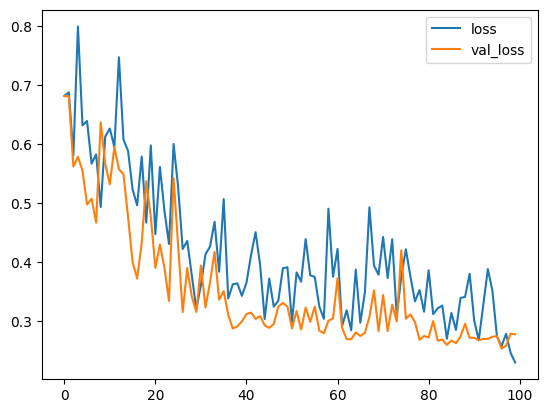

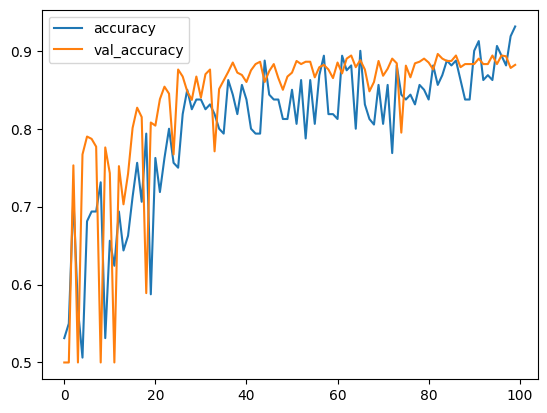

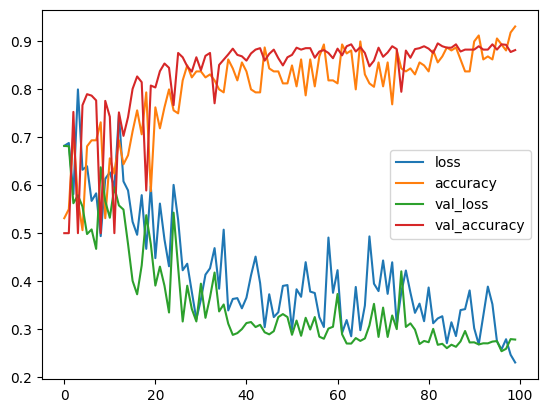

In [ ]:
losses = pd.DataFrame(history.history)
losses.head()
losses[['loss','val_loss']].plot()
losses[['accuracy','val_accuracy']].plot()
losses.plot()

In [ ]:
model.save('skin_model.h5')